In [82]:
listings = pd.read_csv('listings2.csv')
calendar = pd.read_csv('calendar.csv')

In [255]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [256]:
listings.head()

,listing_id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_acceptance_rate,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,17%,...,63,338,48,0,0,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,69%,...,18,194,409,32,0,f,1,1,0,0
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",100%,...,90,365,50,0,0,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",25%,...,12,123,2,1,0,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,100%,...,34,192,507,33,2,f,1,0,1,0


In [257]:
listings.columns

Index(['listing_id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'instant_bookable', 'ca

In [258]:
listings.shape 

(38277, 50)

In [259]:
listings.isnull().sum()

listing_id                                          0
name                                               13
description                                      1192
neighborhood_overview                           15627
host_id                                             0
host_name                                          34
host_since                                         34
host_location                                     137
host_about                                      16149
host_acceptance_rate                            16486
host_is_superhost                                  34
host_neighbourhood                               7464
host_listings_count                                34
host_total_listings_count                          34
host_verifications                                  0
host_has_profile_pic                               34
host_identity_verified                             34
neighbourhood_cleansed                              0
neighbourhood_group_cleansed

In [260]:
listings2 = listings.drop(['description','neighborhood_overview','host_name','host_about',\
               'host_acceptance_rate','host_is_superhost','host_verifications', 'host_has_profile_pic',\
                'host_identity_verified',\
               'number_of_reviews_ltm','number_of_reviews_l30d'], axis=1)


In [261]:
listings2.shape

(38277, 39)

In [262]:
listings2.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [263]:
len(set(listings2['listing_id'])) 

# 38,277 unique airbnb listings for this dataset 

38277

In [264]:
listings2021 = listings2
listings2021.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [265]:
listings2019 = pd.read_csv('NYC_2019.csv')
listings2017 = pd.read_csv('NYC_2017-10.csv')
listings2016 = pd.read_csv('NYC_2016-01.csv')
listings2015 = pd.read_csv('NYC_2015-08.csv')
listings2014 = pd.read_csv('NYC_2014-08.csv')

In [266]:
listings2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [267]:
listings2019.shape

(48895, 16)

In [268]:
listings2017.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
0,18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN


In [269]:
listings2017.shape

(44317, 31)

In [270]:
listings2016.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,105,500.0,Private room,Manhattan,Hell's Kitchen,39,5.0,NaN,1.0,1.0,549.0,1.0,40.762099,-73.996022,2016-01-22 01:32:16.039626
1,1,2515,2758.0,Private room,Manhattan,Harlem,125,4.5,2.0,1.0,2.0,59.0,2.0,40.799205,-73.953676,2016-01-21 16:14:58.025230
2,2,2539,2787.0,Private room,Brooklyn,Kensington,1,5.0,2.0,1.0,1.0,39.0,1.0,40.647486,-73.972370,2016-01-21 17:48:59.403956
3,3,2595,2845.0,Entire home/apt,Manhattan,Midtown,19,5.0,2.0,0.0,1.0,225.0,1.0,40.753621,-73.983774,2016-01-23 16:09:37.688387
4,4,3330,4177.0,Private room,Brooklyn,Williamsburg,19,5.0,2.0,1.0,1.0,90.0,3.0,40.708558,-73.942362,2016-01-22 20:20:20.978411


In [271]:
listings2016.shape[0]

36003

In [272]:
listings2015.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,105,500,Private room,Manhattan,Hell's Kitchen,39,5.0,NaN,1.0,1.0,549.0,1.0,40.762099,-73.996022,2015-08-10 21:44:27.340600
1,1,2515,2758,Private room,Manhattan,Harlem,117,4.5,2.0,1.0,2.0,59.0,2.0,40.799205,-73.953676,2015-08-10 21:44:27.340600
2,2,2595,2845,Entire home/apt,Manhattan,Midtown,17,5.0,2.0,0.0,1.0,285.0,1.0,40.753621,-73.983774,2015-08-10 21:44:27.340600
3,3,3330,4177,Private room,Brooklyn,Williamsburg,16,4.5,2.0,1.0,1.0,125.0,3.0,40.708558,-73.942362,2015-08-10 21:44:27.340600
4,4,3831,4869,Private room,Brooklyn,Clinton Hill,8,4.5,3.0,1.0,1.0,80.0,1.0,40.685138,-73.959757,2015-08-10 21:44:27.340600


In [273]:
listings2014.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,105,500,Private room,Manhattan,Hell's Kitchen,39,5.0,7,1.0,1.0,167.0,1,40.762099,-73.996022,2014-08-31 22:55:08.354
1,1,2515,2758,Private room,Manhattan,Harlem,102,4.5,2,1.0,2.0,66.0,2,40.799205,-73.953676,2014-09-01 02:40:26.770
2,2,2684,2965,Private room,Manhattan,Upper West Side,0,NaN,2,1.0,1.5,134.0,1,40.792353,-73.967807,2014-08-31 23:37:21.967
3,3,2993,3352,Entire home/apt,Manhattan,Lower East Side,2,4.5,2,1.0,1.0,168.0,5,40.723593,-73.991188,2014-09-01 18:06:43.285
4,4,3330,4177,Private room,Brooklyn,Williamsburg,9,5.0,2,1.0,1.0,140.0,3,40.708558,-73.942362,2014-08-31 14:16:24.363


In [274]:
listings2015.columns = listings2015.columns.str.replace('Unnamed: 0', 'listing_id')

In [275]:
listings2014.columns = listings2014.columns.str.replace('Unnamed: 0', 'listing_id')

In [276]:
listings2016.columns = listings2016.columns.str.replace('Unnamed: 0', 'listing_id')

In [277]:
listings2017.columns = listings2017.columns.str.replace('id', 'listing_id')
listings2019.columns = listings2019.columns.str.replace('id', 'listing_id')

In [278]:
print(len(set(listings2014['listing_id'])))
print(len(set(listings2015['listing_id'])))
print(len(set(listings2016['listing_id'])))
print(len(set(listings2017['listing_id'])))
print(len(set(listings2019['listing_id'])))
print(len(set(listings2021['listing_id'])))


20777
30001
36003
44317
48895
38277


In [279]:
tot_2014 = listings2014.shape[0]
tot_2015 = listings2015.shape[0]
tot_2016 = listings2016.shape[0]
tot_2017 = listings2017.shape[0]
tot_2019 = listings2019.shape[0]
tot_2021 = listings2021.shape[0]

print(tot_2014)
print(tot_2015)
print(tot_2016)
print(tot_2017)
print(tot_2019)
print(tot_2021)

# unique values in each dataset 

20777
30001
36003
44317
48895
38277


In [280]:
tot_listings = [1092, 2362, 5628, 10391,tot_2014,tot_2015,tot_2016,tot_2017,52000, tot_2019,36923,tot_2021]
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

def list_todict(list1, list2):
    dict = {}
    dict['year'] = list1
    dict['tot_listings'] = list2
    return dict 
 
listings_over_time = pd.DataFrame(list_todict(year, tot_listings))
listings_over_time.columns = ['Year', 'Active Listings']
listings_over_time 

# source: https://comptroller.nyc.gov/reports/the-impact-of-airbnb-on-nyc-rents/

,Year,Active Listings
0,2010,1092
1,2011,2362
2,2012,5628
3,2013,10391
4,2014,20777
5,2015,30001
6,2016,36003
7,2017,44317
8,2018,52000
9,2019,48895


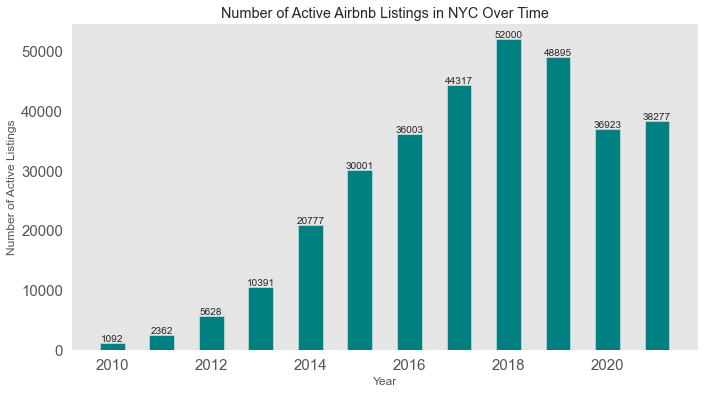

In [281]:
fig, ax = plt.subplots(figsize=(10,6))
num_listings = listings_over_time['Active Listings']
year = listings_over_time['Year']
plt.bar(year, num_listings, color = 'teal', width=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Active Listings")
ax.set_title('Number of Active Airbnb Listings in NYC Over Time')
plt.grid(False)
plt.bar_label(ax.containers[0])

plt.show()

In [282]:
listings2021.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [283]:
listings2021

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,53662330,"HUGE PRIVATE ROOM, AWESOME LOCATION",100146245,2016-10-18,US,Elm Park,1.0,1.0,Port Richmond,Staten Island,...,24,54,84,359,0,f,6,0,6,0
38273,53662542,"LARGE PRVT ROOM, QUIET RESIDENCE PERFECTLOCATION",100146245,2016-10-18,US,Elm Park,1.0,1.0,Port Richmond,Staten Island,...,24,54,84,359,0,f,6,0,6,0
38274,53662772,King Room - Midtown Manhattan,337879004,2020-02-21,"New York, New York, United States",NaN,10.0,10.0,Midtown,Manhattan,...,11,11,11,11,0,t,13,0,13,0
38275,53663081,King Room - Bryant Park.,337879004,2020-02-21,"New York, New York, United States",NaN,10.0,10.0,Midtown,Manhattan,...,3,3,3,3,0,t,13,0,13,0


In [284]:
listings2021 = listings2021.rename(columns = {"neighbourhood_group_cleansed": "area", \
                                               "neighbourhood_cleansed":"neighbourhood"})
listings2021.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,area,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [285]:
# listings broken down by borough 
areas = listings2021.groupby('area')[['listing_id']].count()
areas

,listing_id
area,
Bronx,1104
Brooklyn,14716
Manhattan,16781
Queens,5323
Staten Island,353


In [286]:
areas['sum'] = 38277
areas['proportion'] = round((areas['listing_id']/areas['sum'])*100,2)
areas

areas_perc = areas[['listing_id','proportion']]
areas_perc

,listing_id,proportion
area,,
Bronx,1104,2.88
Brooklyn,14716,38.45
Manhattan,16781,43.84
Queens,5323,13.91
Staten Island,353,0.92


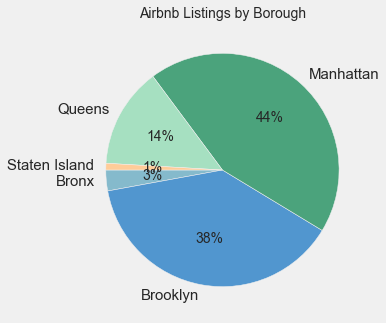

In [287]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
plt.title("Airbnb Listings by Borough", fontsize = 14)
labels = 'Bronx','Brooklyn','Manhattan','Queens','Staten Island'
colors = ['#85bacc','#5196cf','#4ba37c','#a6e0c1','#ffcc99','#ffffbf']
g = plt.pie(areas.proportion, labels=labels, colors=colors, autopct='%1.0f%%', startangle=180)
plt.show()

In [288]:
# listings broken down by neighbourhood
neighbourhood_grp = listings2021.groupby('neighbourhood')[['listing_id']].count()
neighbourhood_grp

,listing_id
neighbourhood,
Allerton,33
Arden Heights,4
Arrochar,18
Arverne,89
Astoria,669
...,...
Windsor Terrace,112
Woodhaven,71
Woodlawn,6


In [289]:
nbhd = neighbourhood_grp.sort_values('listing_id', ascending=False)
top_25_nbhd = nbhd.iloc[1:26,:]
top_25_nbhd = top_25_nbhd.rename(columns={"listing_id":"count"})
top_25_nbhd = top_25_nbhd.sort_values('count', ascending=True)
top_25_nbhd

,count
neighbourhood,
Clinton Hill,381
Flushing,385
Woodside,394
Kips Bay,415
Prospect-Lefferts Gardens,422
Long Island City,424
East Flatbush,448
Flatbush,455
Financial District,470


In [290]:
top_25_nbhd = top_25_nbhd.reset_index()

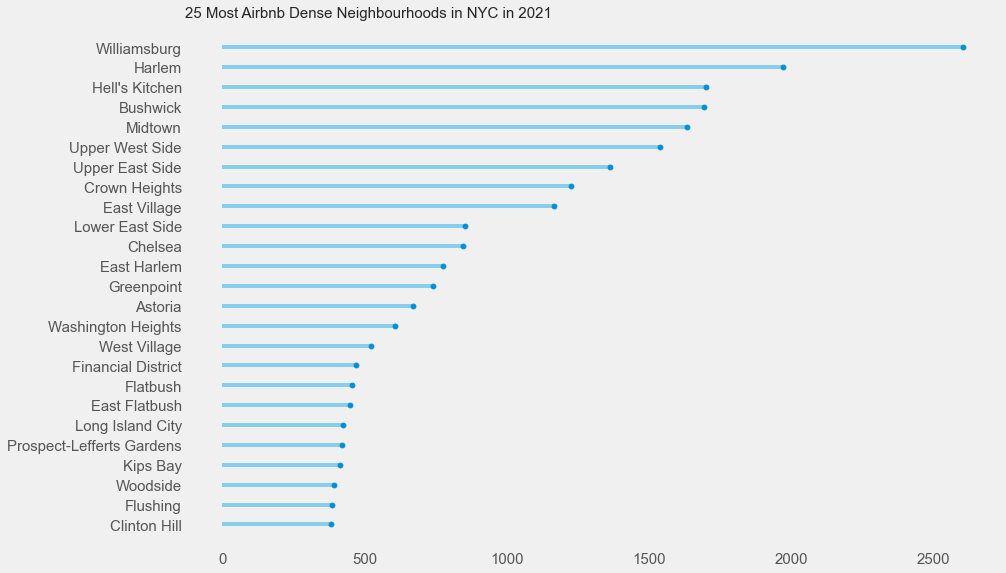

<Figure size 432x288 with 0 Axes>

In [291]:
top_25_nbhd2 = top_25_nbhd['neighbourhood']
count_25nbhd = top_25_nbhd['count']
plt.figure(figsize=(13,9))
fig.patch.set_facecolor('white')

plt.title("25 Most Airbnb Dense Neighbourhoods in NYC in 2021", fontsize = 15, loc='left')
plt.grid(False)
plt.hlines(y=top_25_nbhd2, xmin = 0, xmax = count_25nbhd, color='skyblue')
plt.plot(count_25nbhd, top_25_nbhd2, "o")
plt.show()
plt.savefig('neihgbourhoods.pdf')


In [293]:
# an overwhelming majority (96%) of all active airbnb listings in 2021 were in Manhattan, 
# Brooklyn, and Queens, so these boroughs will be the focus of the analysis 
listings2021.groupby(['room_type'])[['listing_id']].count()

,listing_id
room_type,
Entire home/apt,20397
Hotel room,210
Private room,17098
Shared room,572


In [294]:
# remove hotel room as room_type 
room_types = listings2021[listings2021.room_type != 'Hotel room']
room_types.groupby(['room_type'])[['listing_id']].count()

# entire home/apartment listings make up the majority of all airbnb listings in nyc 

,listing_id
room_type,
Entire home/apt,20397
Private room,17098
Shared room,572


In [295]:
room_types.groupby(['area'])[['listing_id']].count()

,listing_id
area,
Bronx,1103
Brooklyn,14707
Manhattan,16590
Queens,5314
Staten Island,353


In [296]:
room_types.groupby(['area','room_type'])[['listing_id']].count()

listing_id
area          room_type                  
Bronx         Entire home/apt         440
              Private room            634
              Shared room              29
Brooklyn      Entire home/apt        7529
              Private room           6989
              Shared room             189
Manhattan     Entire home/apt       10188
              Private room           6158
              Shared room             244
Queens        Entire home/apt        2056
              Private room           3149
              Shared room             109
Staten Island Entire home/apt         184
              Private room            168
              Shared room               1

In [297]:
room_types['price'] = room_types['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)

/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/1838856465.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  room_types['price'] = room_types['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/1838856465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room_types['price'] = room_types['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)


In [298]:
room_types2 = room_types[(room_types.price <= 1000) & (room_types.price > 20)][['listing_id','room_type','price']].sort_values('price',ascending=False)
room_types2.groupby(['room_type'])[['listing_id']].count()
# slightly less numbers from the price filter 


,listing_id
room_type,
Entire home/apt,20156
Private room,16969
Shared room,549


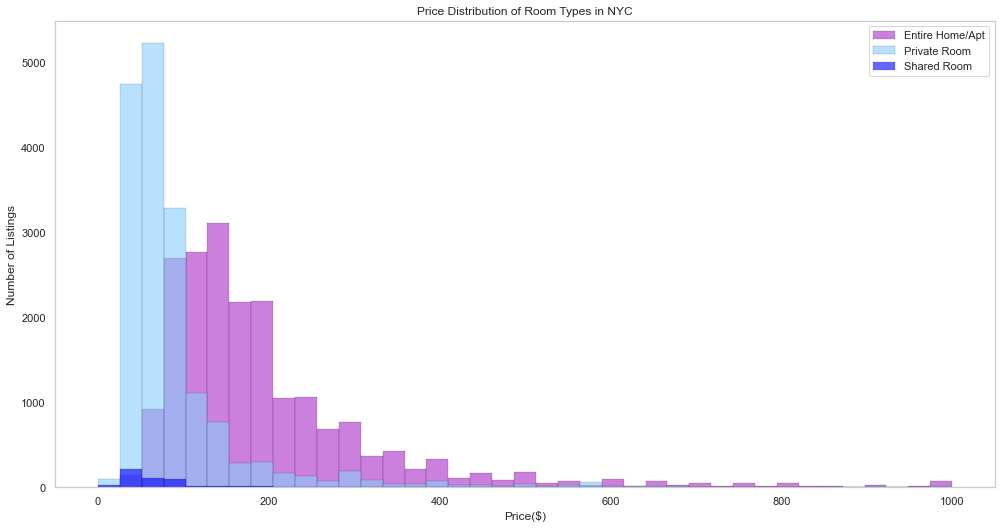

In [593]:
entire_home_price = room_types2[room_types2.room_type == 'Entire home/apt']['price'].tolist()
private_room = room_types2[room_types2.room_type == 'Private room']['price'].tolist()
shared_room = room_types2[room_types2.room_type == 'Shared room']['price'].tolist()

plt.figure(figsize=(15,8))
fig.patch.set_facecolor('White')
bins = np.linspace(0, 1000, 40)
plt.hist(entire_home_price, bins, alpha=0.75, color = "mediumorchid", label="Entire Home/Apt", edgecolor='black', linewidth=0.2)
plt.hist(private_room, bins, alpha=0.6, color = "lightskyblue", label="Private Room", edgecolor='black', linewidth=0.2)
plt.hist(shared_room, bins, alpha=0.6, color = "blue", label="Shared Room", edgecolor='black', linewidth=0.2)

plt.title('Price Distribution of Room Types in NYC')
plt.xlabel('Price($)')
plt.ylabel("Number of Listings")
plt.legend()
plt.grid(False)

In [625]:
manhattan = room_types[room_types.area == 'Manhattan']

In [595]:
manhattan['price'] = manhattan['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [597]:
type(manhattan['price'][0])

numpy.float64

In [598]:
manhattan[['room_type','price','listing_id']].sort_values('price', ascending=False)

,room_type,price,listing_id
23199,Private room,10000.0,38993679
23198,Private room,10000.0,38993616
15097,Entire home/apt,10000.0,22436899
19395,Shared room,10000.0,31219800
23619,Private room,10000.0,39574087
...,...,...,...
27763,Private room,11.0,45485378
31390,Entire home/apt,10.0,49409612
32533,Entire home/apt,10.0,50444487
16901,Entire home/apt,10.0,26602421


In [599]:
manhattan[(manhattan.price > 1000)][['room_type','price']].count()

room_type    253
price        253
dtype: int64

In [600]:
manhattan[(manhattan.price < 20)][['room_type','price']].count()

room_type    8
price        8
dtype: int64

In [601]:
# There are only 253 listings with prices > 1000 per night, which skews the price data significantly 
# Upon closer inspection, they appeared to be expensive hotel listings, loft listings or penthouses designed for parties

ma2 = manhattan[(manhattan.price <= 1000) & (manhattan.price > 20)][['listing_id','room_type','price']].sort_values('price',ascending=False)
ma2.groupby(['room_type'])[['listing_id']].count()

,listing_id
room_type,
Entire home/apt,10012
Private room,6077
Shared room,240


In [ ]:
#pd.cut(ma2['price'],bins=40)
#pd.cut(ma2['price'],bins=40).value_counts()

In [ ]:
#fig, ax = plt.subplots(figsize=(10,10))
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=ma2["price"])
#ax = sns.barplot(x="price", y="listing_id", data=ma2)

#plt.show()



In [ ]:
#ma2.groupby(['room_type'])['price'].count()

In [ ]:
#ma2.groupby(['room_type'])['price'].plot(kind='hist',legend=True, stacked=True, bins=40)
#plt.xlabel('Price ($)')
#plt.ylabel('Number of Listings')
#plt.title('Airbnb Listings in Manhatten by Price and Room Type', fontsize = 12)
#plt.grid(False)


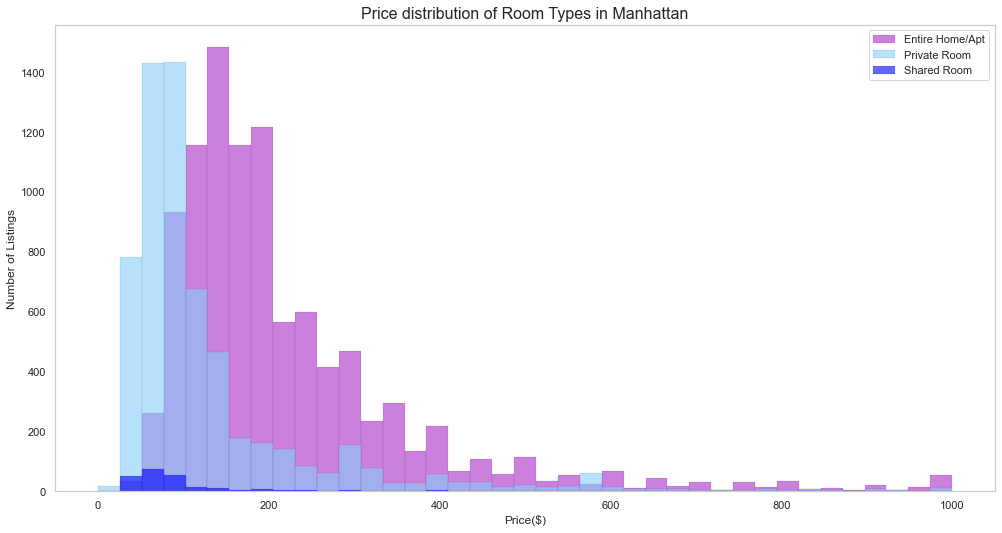

In [606]:
ma_entire_home_price = ma2[ma2.room_type == 'Entire home/apt']['price'].tolist()
ma_private_room = ma2[ma2.room_type == 'Private room']['price'].tolist()
ma_shared_room = ma2[ma2.room_type == 'Shared room']['price'].tolist()
plt.figure(figsize=(15,8))
bins = np.linspace(0, 1000, 40)
plt.hist(ma_entire_home_price, bins, alpha=0.75, color = "mediumorchid", label="Entire Home/Apt", edgecolor='black', linewidth=0.1)
plt.hist(ma_private_room, bins, alpha=0.6, color = "lightskyblue", label="Private Room", edgecolor='black', linewidth=0.1)
plt.hist(ma_shared_room, bins, alpha=0.6, color = "blue", label="Shared Room", edgecolor='black', linewidth=0.1)

plt.title('Price distribution of Room Types in Manhattan',fontsize=16)
plt.xlabel('Price($)')
plt.ylabel('Number of Listings')
plt.legend()
plt.grid(False)

In [615]:
brooklyn = room_types[room_types.area == 'Brooklyn']
#brooklyn['price'] = brooklyn['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
#type(brooklyn['price'][0])
brooklyn[['room_type','price','listing_id']].sort_values('price', ascending=False)
brooklyn[(brooklyn.price > 1000)][['room_type','price']].count()
brooklyn[(brooklyn.price < 20)][['room_type','price']].count()
br = brooklyn[(brooklyn.price <= 1000) & (brooklyn.price > 20)][['listing_id','room_type','price']].sort_values('price',ascending=False)
br.groupby(['room_type'])[['listing_id']].count()


,listing_id
room_type,
Entire home/apt,7481
Private room,6955
Shared room,180


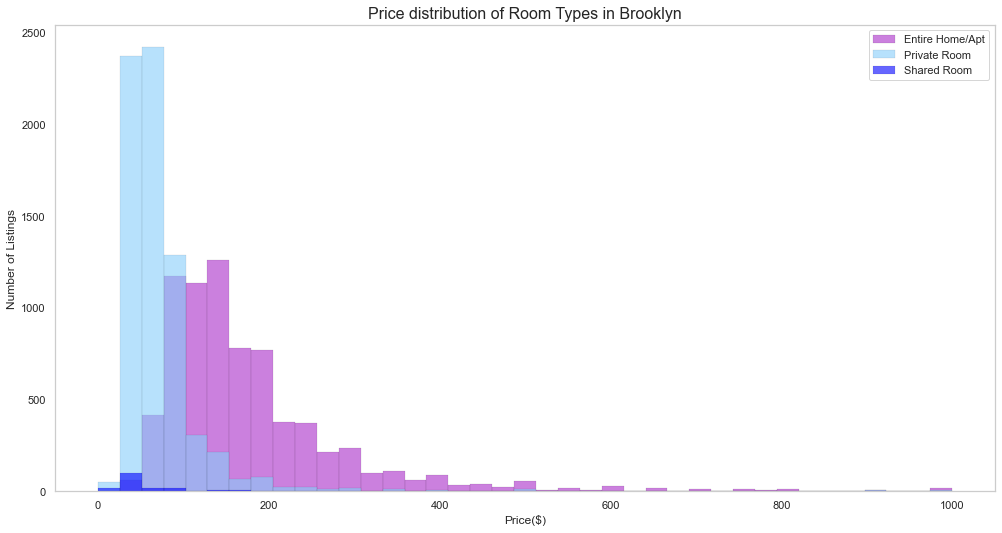

In [617]:
br_entire_home_price = br[br.room_type == 'Entire home/apt']['price'].tolist()
br_private_room = br[br.room_type == 'Private room']['price'].tolist()
br_shared_room = br[br.room_type == 'Shared room']['price'].tolist()
plt.figure(figsize=(15,8))
bins = np.linspace(0, 1000, 40)
plt.hist(br_entire_home_price, bins, alpha=0.75, color = "mediumorchid", label="Entire Home/Apt", edgecolor='black', linewidth=0.1)
plt.hist(br_private_room, bins, alpha=0.6, color = "lightskyblue", label="Private Room", edgecolor='black', linewidth=0.1)
plt.hist(br_shared_room, bins, alpha=0.6, color = "blue", label="Shared Room", edgecolor='black', linewidth=0.1)

plt.title('Price distribution of Room Types in Brooklyn',fontsize=16)
plt.xlabel('Price($)')
plt.ylabel('Number of Listings')
plt.legend()
plt.grid(False)

In [618]:
queens = room_types[room_types.area == 'Queens']
#brooklyn['price'] = brooklyn['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
#type(brooklyn['price'][0])
queens[['room_type','price','listing_id']].sort_values('price', ascending=False)
queens[(queens.price > 1000)][['room_type','price']].count()
queens[(queens.price < 20)][['room_type','price']].count()
qu = queens[(queens.price <= 1000) & (queens.price > 20)][['listing_id','room_type','price']].sort_values('price',ascending=False)
qu.groupby(['room_type'])[['listing_id']].count()


,listing_id
room_type,
Entire home/apt,2041
Private room,3140
Shared room,99


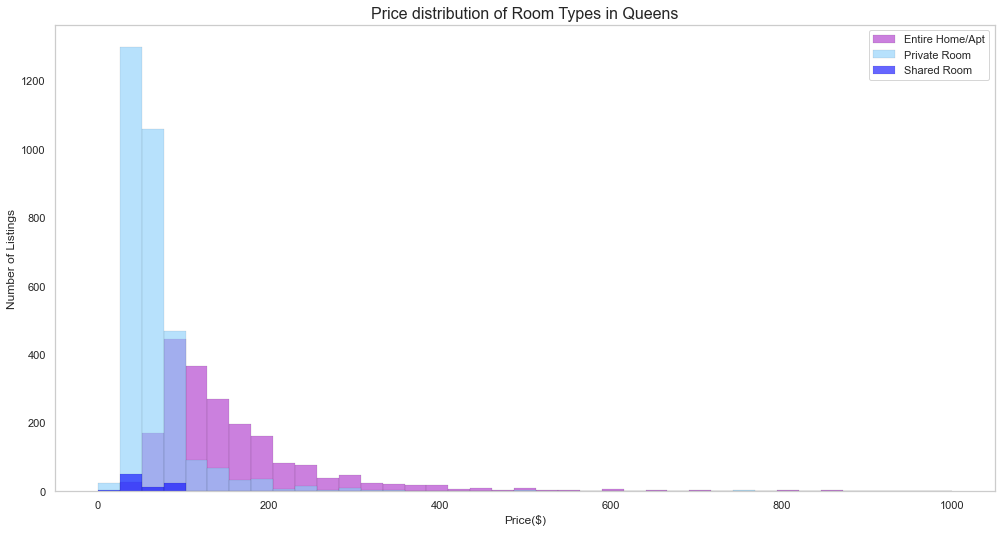

In [619]:
qu_entire_home_price = qu[qu.room_type == 'Entire home/apt']['price'].tolist()
qu_private_room = qu[qu.room_type == 'Private room']['price'].tolist()
qu_shared_room = qu[qu.room_type == 'Shared room']['price'].tolist()
plt.figure(figsize=(15,8))
bins = np.linspace(0, 1000, 40)
plt.hist(qu_entire_home_price, bins, alpha=0.75, color = "mediumorchid", label="Entire Home/Apt", edgecolor='black', linewidth=0.1)
plt.hist(qu_private_room, bins, alpha=0.6, color = "lightskyblue", label="Private Room", edgecolor='black', linewidth=0.1)
plt.hist(qu_shared_room, bins, alpha=0.6, color = "blue", label="Shared Room", edgecolor='black', linewidth=0.1)

plt.title('Price distribution of Room Types in Queens',fontsize=16)
plt.xlabel('Price($)')
plt.ylabel('Number of Listings')
plt.legend()
plt.grid(False)

AttributeError: 'list' object has no attribute 'set'

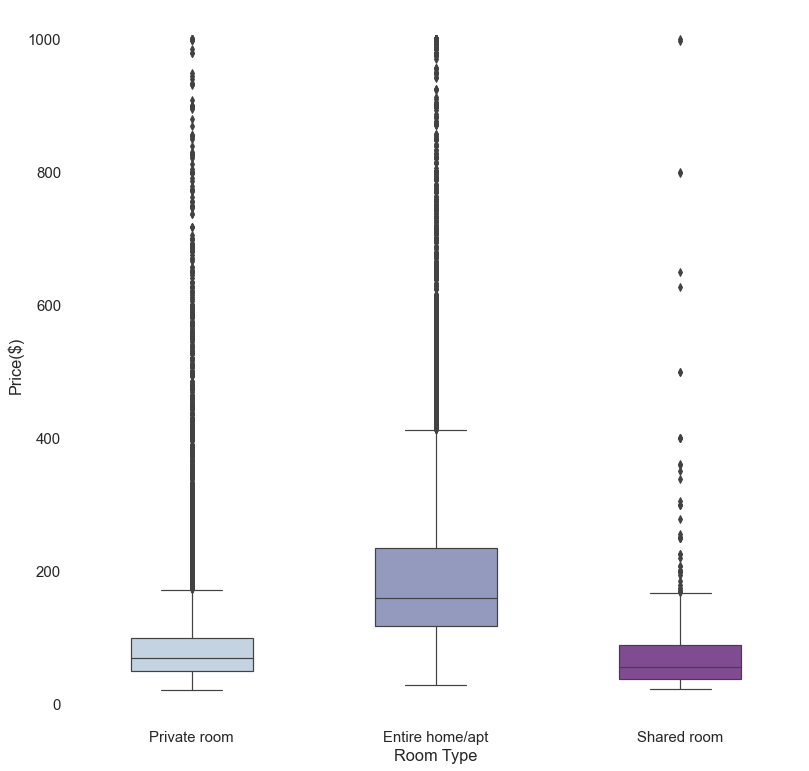

In [314]:
room_types_price = room_types2[["room_type","price"]]
room_types_price
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'price', data = room_types_price, width = 0.5, palette = "BuPu")\
    .set(xlabel='Room Type', ylabel='Price($)')\
    .set(title='Room Type vs Price')


AttributeError: 'list' object has no attribute 'set'

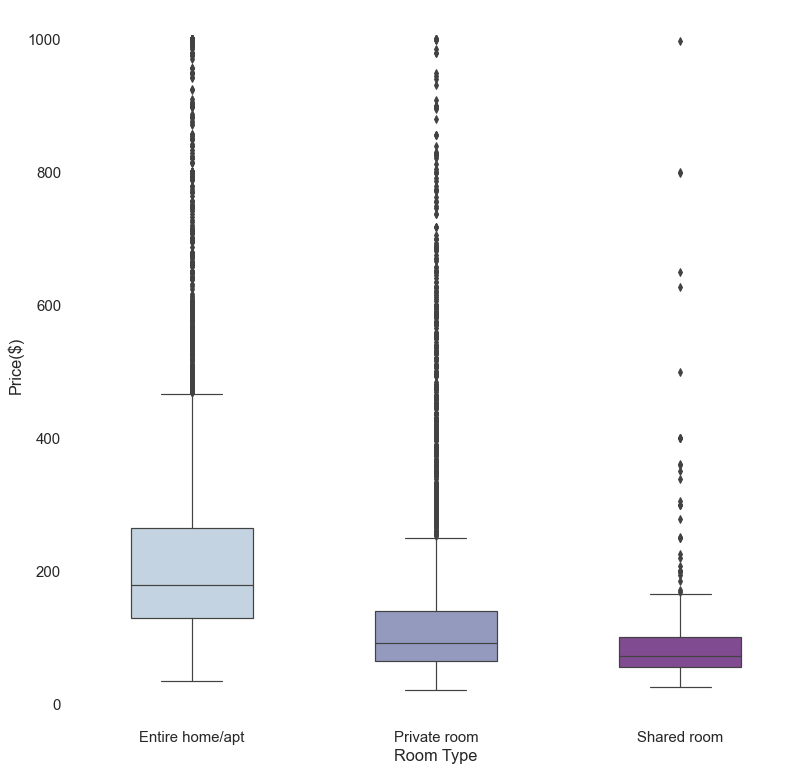

In [626]:
manhattan = manhattan[(manhattan.price <= 1000) & (manhattan.price > 20)][['listing_id','room_type','price']].sort_values('price',ascending=False)
ma_box = manhattan[["room_type","price"]]
ma_box
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'price', data = ma_box, width = 0.5, palette = "BuPu")\
    .set(xlabel='Room Type', ylabel='Price($)')\
    .set(title='Room Type vs Price in Manhattan')


In [629]:
manhattan.groupby('room_type')[['price']].median()

,price
room_type,
Entire home/apt,179.0
Private room,92.0
Shared room,71.5


AttributeError: 'list' object has no attribute 'set'

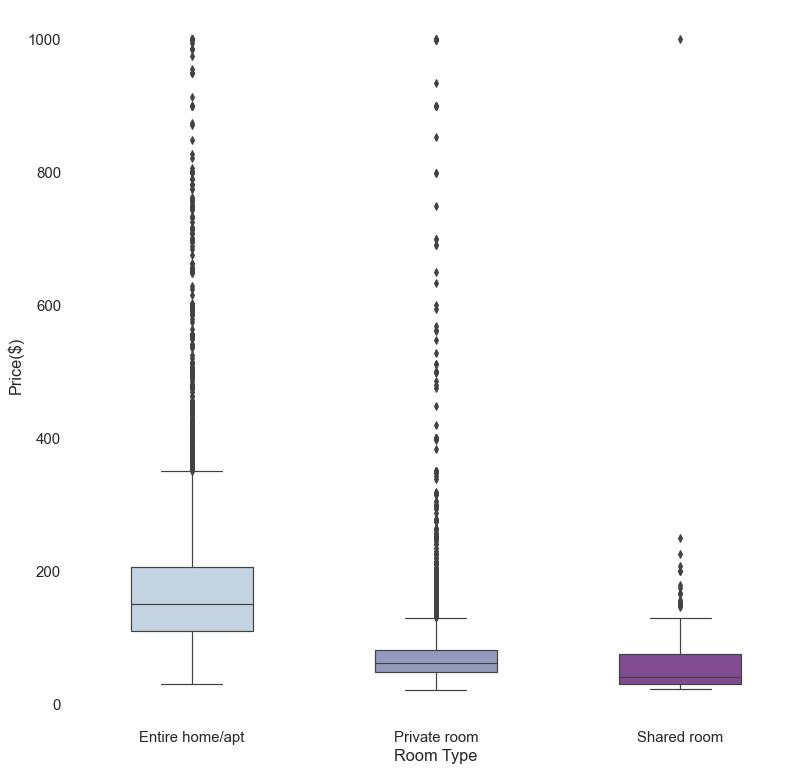

In [627]:
brooklyn = brooklyn[(brooklyn.price <= 1000) & (brooklyn.price > 20)][['listing_id','room_type','price']].sort_values('price',ascending=False)
br_box = brooklyn[["room_type","price"]]
br_box
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'price', data = br_box, width = 0.5, palette = "BuPu")\
    .set(xlabel='Room Type', ylabel='Price($)')\
    .set(title='Room Type vs Price in Brooklyn')


In [630]:
brooklyn.groupby('room_type')[['price']].median()

,price
room_type,
Entire home/apt,150.0
Private room,61.0
Shared room,40.0


AttributeError: 'list' object has no attribute 'set'

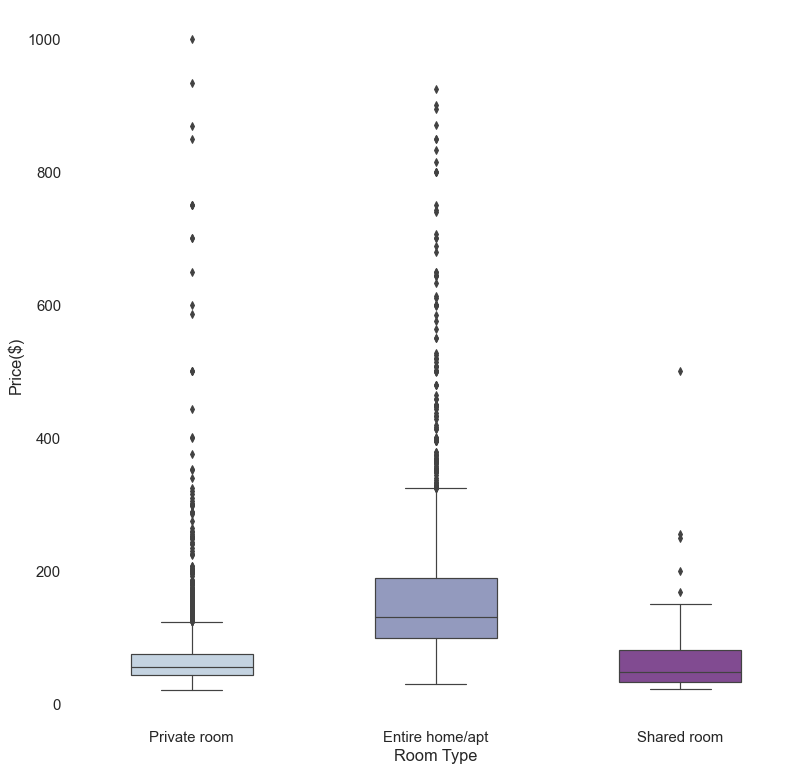

In [628]:
queens = queens[(queens.price <= 1000) & (queens.price > 20)][['listing_id','room_type','price']].sort_values('price',ascending=False)
qu_box = queens[["room_type","price"]]
qu_box
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'price', data = qu_box, width = 0.5, palette = "BuPu")\
    .set(xlabel='Room Type', ylabel='Price($)')\
    .set(title='Room Type vs Price in Queens')

In [631]:
queens.groupby('room_type')[['price']].median()

,price
room_type,
Entire home/apt,130.0
Private room,56.0
Shared room,48.0


AttributeError: 'list' object has no attribute 'set'

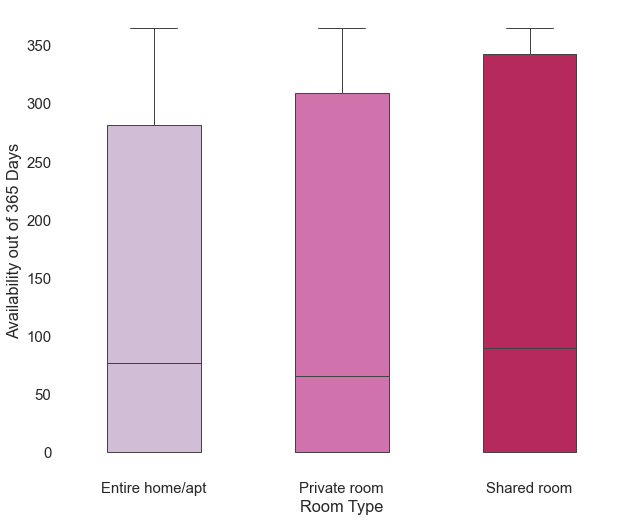

In [346]:
# availability throughout the year 

avail = room_types[["room_type","availability_365"]]
sns.set(rc={'figure.figsize':(9,8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'availability_365', data = avail, width = 0.5, linewidth = 1.0, palette = "PuRd")\
    .set(xlabel='Room Type', ylabel='Availability out of 365 Days')\
    .set(title='Room Type vs Year Availability')


# We can see that the median availabilities for each of the different room types is similar being around the 75
# day mark. 
# For all three room types, 25% of all listings are available for most of the year. For entire home/apt 
# listings, 25% of these listings are available for, roughly 275 days or more, making up most of the year.
# The other room types, 25% of these listings are being listed for an even greater proportion of the year. 
# So overall, it looks to be like a quarter of all airbnb listings are being used solely for that purpose. 

# Half of the listings seem to be available for only a small portion of the year, suggesting that hosts are 
# only making their apartment available for a portion of the year for whatever reason, whether it be for travel,
# business, etc. 


AttributeError: 'list' object has no attribute 'set'

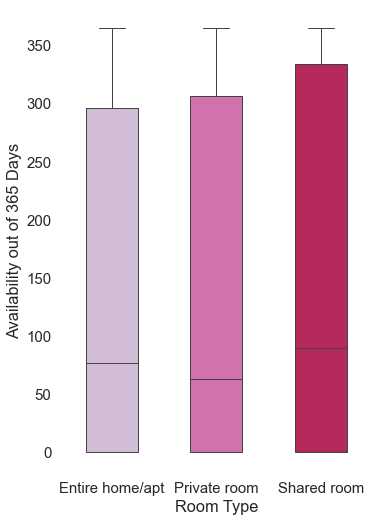

In [638]:
manhattan_area = manhattan_area[manhattan_area.room_type != 'Hotel room']
maavail = manhattan_area[["room_type","availability_365"]]
sns.set(rc={'figure.figsize':(5,8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'availability_365', data = maavail, width = 0.5, linewidth = 1.0, palette = "PuRd")\
    .set(xlabel='Room Type', ylabel='Availability out of 365 Days')\
    .set(title='Room Type vs Year Availability')



AttributeError: 'list' object has no attribute 'set'

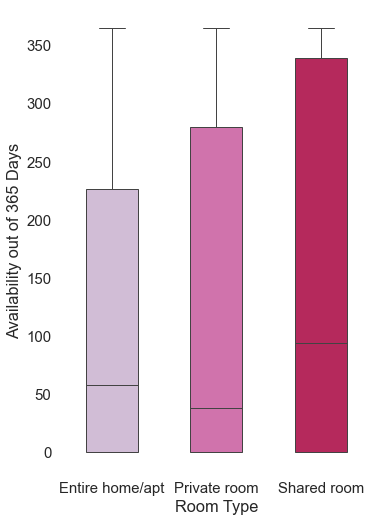

In [639]:
brooklyn_area = brooklyn_area[brooklyn_area.room_type != 'Hotel room']
bravail = brooklyn_area[["room_type","availability_365"]]
sns.set(rc={'figure.figsize':(5,8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'availability_365', data = bravail, width = 0.5, linewidth = 1.0, palette = "PuRd")\
    .set(xlabel='Room Type', ylabel='Availability out of 365 Days')\
    .set(title='Room Type vs Year Availability')



AttributeError: 'list' object has no attribute 'set'

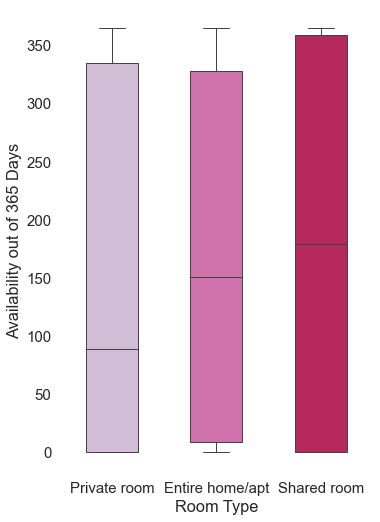

In [652]:
queens_area = queens_area[queens_area.room_type != 'Hotel room']
quavail = queens_area[["room_type","availability_365"]]
sns.set(rc={'figure.figsize':(5,8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'availability_365', data = quavail, width = 0.5, linewidth = 1.0, palette = "PuRd")\
    .set(xlabel='Room Type', ylabel='Availability out of 365 Days')\
    .set(title='Room Type vs Year Availability')



In [641]:
manhattan_area.groupby('room_type')[['availability_365']].median()

,availability_365
room_type,
Entire home/apt,77.0
Private room,63.0
Shared room,90.0


In [642]:
brooklyn_area.groupby('room_type')[['availability_365']].median()

,availability_365
room_type,
Entire home/apt,58.0
Private room,38.0
Shared room,94.0


In [643]:
queens_area.groupby('room_type')[['availability_365']].median()

,availability_365
room_type,
Entire home/apt,151.0
Private room,89.0
Shared room,179.0


In [195]:
host_df = listings2021.dropna(subset=['host_total_listings_count'])
host_df[['host_total_listings_count']].isnull().sum()
#remove Na's rows 

In [371]:
host_df = listings2021.sort_values('host_total_listings_count', ascending=False).drop_duplicates('host_id').sort_index()
host_df = host_df[host_df.room_type != 'Hotel room']


In [373]:
host_df.host_total_listings_count = host_df.host_total_listings_count.replace(0,1)

In [374]:
host_df[["host_total_listings_count"]]

,host_total_listings_count
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
...,...
38259,1.0
38260,1.0
38264,1.0
38269,2.0


In [375]:
# checking validity of host_total_listings_count column 
host_df2 = listings2021.groupby("host_id")[["listing_id"]].count()

In [376]:
host_df2.sort_values("listing_id") #same number of row

,listing_id
host_id,
2438,1
64109887,1
64091336,1
64076428,1
64060155,1
...,...
51501835,177
3223938,180
158969505,201


In [377]:
host_df[(host_df.host_total_listings_count > 10)][['host_id','host_total_listings_count']]



# want to change values greater than 10 listings to "10+" 

,host_id,host_total_listings_count
79,128669,11.0
121,272006,13.0
216,417504,27.0
1692,8792814,13.0
1757,7245581,19.0
...,...,...
37202,143759042,24.0
37533,90713895,15.0
38110,24132769,19.0
38204,200239515,131.0


In [378]:
type(host_df['host_total_listings_count'][1])
# column is a float, must convert to string first 

numpy.float64

In [379]:
host_df['host_total_listings_count'] = host_df['host_total_listings_count'].astype(float)
type(host_df['host_total_listings_count'][1])

numpy.float64

In [655]:
hl = host_df[['host_id', 'host_total_listings_count', 'room_type','area']]
hl

hl['host_total_listings_count'] = hl['host_total_listings_count'].mask(hl['host_total_listings_count'] > 10, ">10")
hl

/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/876627937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hl['host_total_listings_count'] = hl['host_total_listings_count'].mask(hl['host_total_listings_count'] > 10, ">10")


,host_id,host_total_listings_count,room_type,area
1,4869,1.0,Entire home/apt,Brooklyn
2,7356,1.0,Private room,Brooklyn
3,7378,1.0,Entire home/apt,Brooklyn
4,8967,1.0,Private room,Manhattan
5,7490,1.0,Private room,Manhattan
...,...,...,...,...
38259,293534030,1.0,Entire home/apt,Manhattan
38260,57401970,1.0,Entire home/apt,Manhattan
38264,87056606,1.0,Entire home/apt,Manhattan
38269,99421256,2.0,Entire home/apt,Bronx


In [656]:
host_count = hl.groupby(['host_total_listings_count'])[['host_id']].count()
host_count = host_count.reset_index()
host_count['host_total_listings_count'] = host_count['host_total_listings_count'].astype(str)
type(host_count['host_total_listings_count'][6])

str

In [657]:
host_count.head()

,host_total_listings_count,host_id
0,1.0,20402
1,2.0,3202
2,3.0,1038
3,4.0,412
4,5.0,201


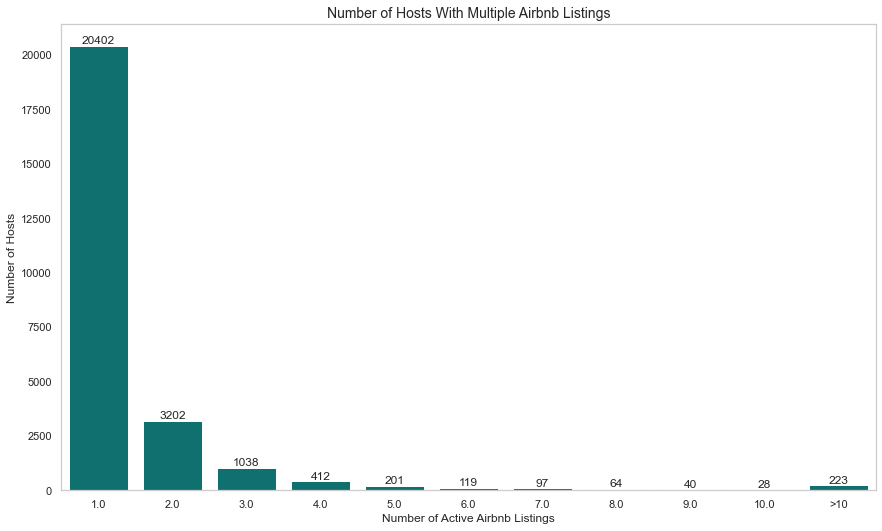

In [463]:
num_hosts = host_count['host_id']
num_lists = host_count['host_total_listings_count']

fig, ax = plt.subplots(figsize=(13,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="host_total_listings_count", y="host_id", color ='teal', data=host_count)

ax.set_title('Number of Hosts With Multiple Airbnb Listings', fontsize=14)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.xlabel('Number of Active Airbnb Listings')
plt.ylabel("Number of Hosts")
plt.show()

In [670]:
manhattan_hostnum = hl[hl.area == 'Manhattan']
manhattan_hostnum
manhattan_hostnum = manhattan_hostnum.groupby(['host_total_listings_count'])[['host_id']].count()
manhattan_hostnum = manhattan_hostnum.reset_index()


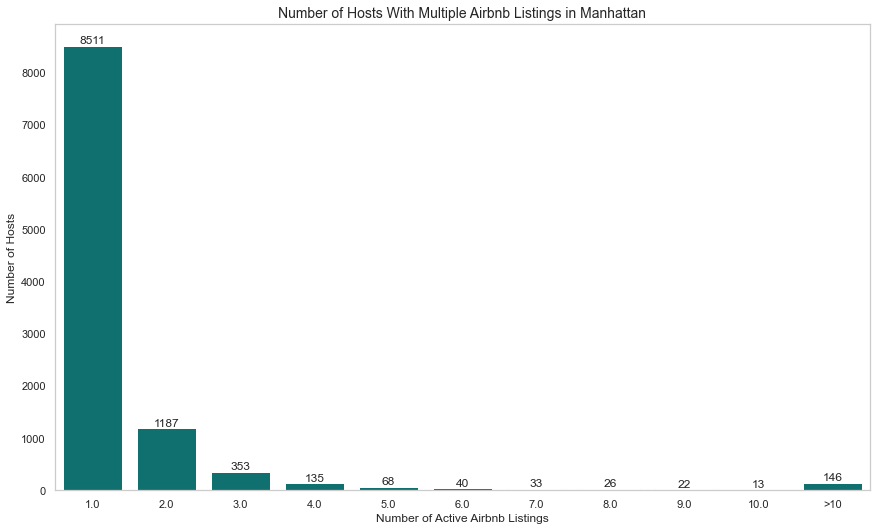

In [671]:
ma_num_hosts = manhattan_hostnum['host_id']
ma_num_lists = manhattan_hostnum['host_total_listings_count']

fig, ax = plt.subplots(figsize=(13,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="host_total_listings_count", y="host_id", color ='teal', data=manhattan_hostnum)

ax.set_title('Number of Hosts With Multiple Airbnb Listings in Manhattan', fontsize=14)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.xlabel('Number of Active Airbnb Listings')
plt.ylabel("Number of Hosts")
plt.show()

In [672]:
brooklyn_hostnum = hl[hl.area == 'Brooklyn']
brooklyn_hostnum
brooklyn_hostnum = brooklyn_hostnum.groupby(['host_total_listings_count'])[['host_id']].count()
brooklyn_hostnum = brooklyn_hostnum.reset_index()


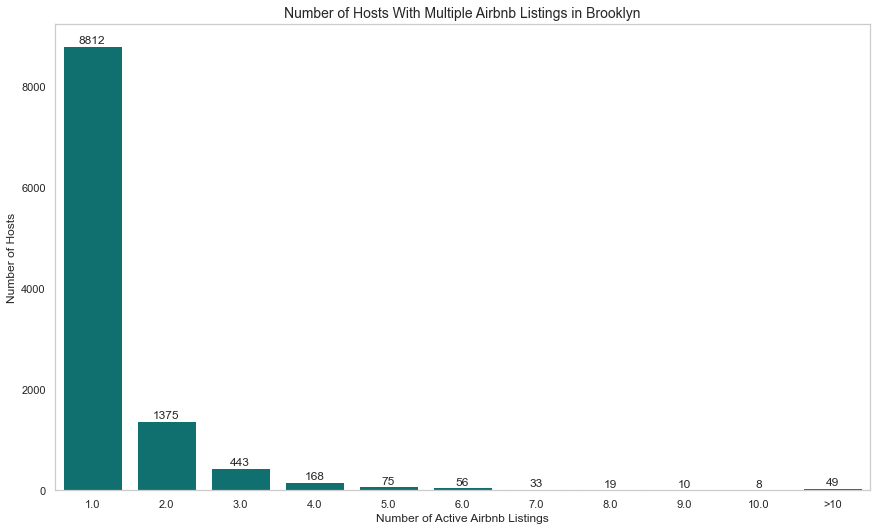

In [673]:
fig, ax = plt.subplots(figsize=(13,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="host_total_listings_count", y="host_id", color ='teal', data=brooklyn_hostnum)

ax.set_title('Number of Hosts With Multiple Airbnb Listings in Brooklyn', fontsize=14)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.xlabel('Number of Active Airbnb Listings')
plt.ylabel("Number of Hosts")
plt.show()

In [674]:
queens_hostnum = hl[hl.area == 'Queens']
queens_hostnum
queens_hostnum = queens_hostnum.groupby(['host_total_listings_count'])[['host_id']].count()
queens_hostnum = queens_hostnum.reset_index()


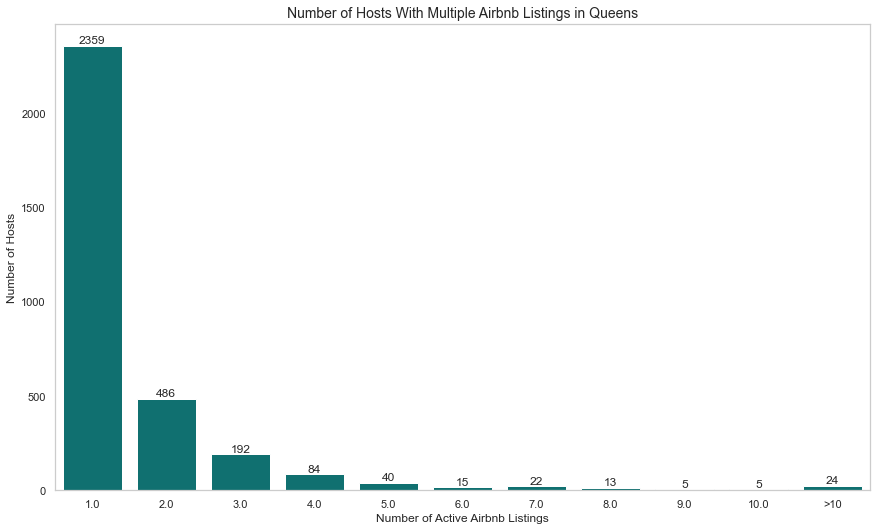

In [675]:
fig, ax = plt.subplots(figsize=(13,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="host_total_listings_count", y="host_id", color ='teal', data=queens_hostnum)

ax.set_title('Number of Hosts With Multiple Airbnb Listings in Queens', fontsize=14)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.xlabel('Number of Active Airbnb Listings')
plt.ylabel("Number of Hosts")
plt.show()

In [465]:
room_types.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood', 'area', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [547]:
listings2021['has_TV'] = listings2021['amenities'].apply(lambda x: 1 if x.find("TV") != -1 else 0)

In [548]:
listings2021['has_parking'] = listings2021['amenities'].apply(lambda x: 1 if x.find("parking") != -1 else 0)

In [549]:
listings2021['has_luggage_dropoff'] = listings2021['amenities'].apply(lambda x: 1 if x.find("Luggage dropoff") != -1 else 0)

In [550]:
listings2021.groupby('has_luggage_dropoff')[['listing_id']].count()

,listing_id
has_luggage_dropoff,
0,31416
1,6861


In [551]:
listings2021['has_workspace'] = listings2021['amenities'].apply(lambda x: 1 if x.find("workspace") != -1 else 0)

In [552]:
listings2021.groupby('has_workspace')[['listing_id']].count()

,listing_id
has_workspace,
0,13860
1,24417


In [569]:
listings2021['has_hairdryer'] = listings2021['amenities'].apply(lambda x: 1 if x.find("Hair dryer") != -1 else 0)

In [570]:
listings2021.groupby('has_hairdryer')[['listing_id']].count()

,listing_id
has_hairdryer,
0,14184
1,24093


In [571]:
listings2021['has_balcony'] = listings2021['amenities'].apply(lambda x: 1 if x.find("balcony") != -1 else 0)

In [572]:
listings2021.groupby('has_balcony')[['listing_id']].count()

,listing_id
has_balcony,
0,34252
1,4025


In [573]:
listings2021['has_private_bath'] =  listings2021['bathrooms_text'].astype(str).apply(lambda x: 1 if x.find("private bath") != -1 else 0)

In [574]:
listings2021.groupby('has_private_bath')[['listing_id']].count()

,listing_id
has_private_bath,
0,35519
1,2758


In [575]:
has_amenities = listings2021[['price','bedrooms','accommodates','has_TV','has_private_bath','has_balcony','has_hairdryer','has_workspace','has_luggage_dropoff','has_parking']]
has_amenities['price'] = has_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
has_amenities


#= listings2021[listings2021.room_type != 'Hotel room']


/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/773365897.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  has_amenities['price'] = has_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/773365897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_amenities['price'] = has_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)


,price,bedrooms,accommodates,has_TV,has_private_bath,has_balcony,has_hairdryer,has_workspace,has_luggage_dropoff,has_parking
0,150.0,NaN,1,1,0,0,1,1,1,1
1,75.0,1.0,3,1,0,0,1,1,1,1
2,60.0,1.0,2,0,0,0,0,0,0,0
3,275.0,2.0,4,1,0,0,0,0,0,0
4,68.0,1.0,2,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
38272,79.0,1.0,2,1,0,0,0,0,0,0
38273,76.0,1.0,2,1,0,0,0,0,0,0
38274,116.0,1.0,2,1,1,0,1,1,0,0
38275,106.0,1.0,2,1,0,0,1,1,0,0


/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/3451806825.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(has_amenities.corr(), dtype=np.bool))


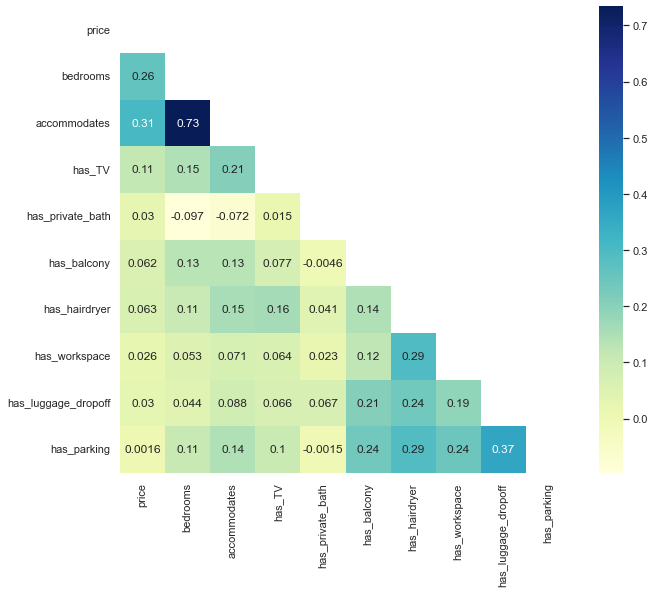

In [576]:
corrMatrix = has_amenities.corr()
mask = np.triu(np.ones_like(has_amenities.corr(), dtype=np.bool))
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu', mask=mask)
plt.show()

In [583]:
manhattan_area = listings2021[listings2021.area == 'Manhattan']
brooklyn_area = listings2021[listings2021.area == 'Brooklyn']
queens_area = listings2021[listings2021.area == 'Queens']

In [591]:
manhattan_amenities = manhattan_area[['price','bedrooms','accommodates','has_TV','has_private_bath','has_balcony','has_hairdryer','has_workspace','has_luggage_dropoff','has_parking']]
manhattan_amenities['price'] = manhattan_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
manhattan_amenities


/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/3070546433.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  manhattan_amenities['price'] = manhattan_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/3070546433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_amenities['price'] = manhattan_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)


,price,bedrooms,accommodates,has_TV,has_private_bath,has_balcony,has_hairdryer,has_workspace,has_luggage_dropoff,has_parking
0,150.0,NaN,1,1,0,0,1,1,1,1
4,68.0,1.0,2,1,0,0,1,0,1,1
5,75.0,1.0,1,0,0,0,1,1,0,1
8,65.0,1.0,1,0,0,0,0,1,1,1
9,62.0,1.0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
38264,1200.0,2.0,8,1,0,0,0,1,0,1
38268,400.0,1.0,2,1,0,0,1,1,0,0
38270,159.0,1.0,3,1,0,0,1,1,0,0
38274,116.0,1.0,2,1,1,0,1,1,0,0


/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/3618966661.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(manhattan_amenities.corr(), dtype=np.bool))


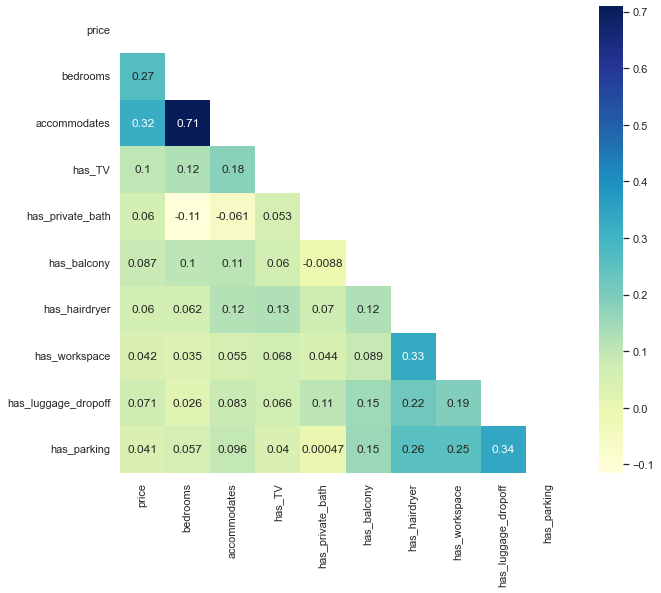

In [592]:
manhattanMatrix = manhattan_amenities.corr()
mask = np.triu(np.ones_like(manhattan_amenities.corr(), dtype=np.bool))
sns.heatmap(manhattanMatrix, annot=True, cmap='YlGnBu', mask=mask)
plt.show()

In [584]:
manhattan_area.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,area,...,calculated_host_listings_count_shared_rooms,has_TV,has_parking,has_luggage_dropoff,has_workspace,has_hairdryer,has_balcony,is_shared_bath,is_private_bath,has_private_bath
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,0,1,1,1,1,1,0,0,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,0,1,1,1,0,1,0,0,0,0
5,5203,Cozy Clean Guest Room - Family Apt,7490,2009-02-05,"New York, New York, United States",Upper West Side,1.0,1.0,Upper West Side,Manhattan,...,0,0,1,0,1,1,0,1,0,0
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,2009-05-07,"New York, New York, United States",East Harlem,0.0,0.0,East Harlem,Manhattan,...,0,0,1,1,1,0,0,1,0,0
9,6990,UES Beautiful Blue Room,16800,2009-05-12,"New York, New York, United States",East Harlem,3.0,3.0,East Harlem,Manhattan,...,0,0,1,0,0,1,0,1,0,0


In [585]:
brooklyn_area.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,area,...,calculated_host_listings_count_shared_rooms,has_TV,has_parking,has_luggage_dropoff,has_workspace,has_hairdryer,has_balcony,is_shared_bath,is_private_bath,has_private_bath
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,0,1,1,1,1,1,0,0,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,0,0,0,0,0,0,0,0,0,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,0,1,0,0,0,0,0,0,0,0
6,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,2009-03-10,"New York, New York, United States",Park Slope,3.0,3.0,South Slope,Brooklyn,...,0,0,1,1,1,1,1,0,0,0
7,6848,Only 2 stops to Manhattan studio,15991,2009-05-06,"New York, New York, United States",Williamsburg,1.0,1.0,Williamsburg,Brooklyn,...,0,1,1,0,1,1,0,0,0,0


In [586]:
queens_area.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,area,...,calculated_host_listings_count_shared_rooms,has_TV,has_parking,has_luggage_dropoff,has_workspace,has_hairdryer,has_balcony,is_shared_bath,is_private_bath,has_private_bath
23,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,2009-10-31,"New York, New York, United States",Long Island City,1.0,1.0,Long Island City,Queens,...,0,0,1,1,1,1,1,0,1,1
25,13121,(E) RIGHT ON BUDGET,27848,2009-07-27,"New York, New York, United States",Jamaica,4.0,4.0,Jamaica,Queens,...,0,1,1,0,0,0,0,0,1,1
86,39593,A room of own with a Manhattan view,110506,2010-04-18,"Queens, New York, United States",Sunnyside,1.0,1.0,Sunnyside,Queens,...,0,0,1,0,1,1,0,1,0,0
100,45910,Beautiful Queens Brownstone! - 5BR,204539,2010-08-17,"Queens, New York, United States",Ridgewood,5.0,5.0,Ridgewood,Queens,...,0,1,1,0,0,1,0,0,0,0
109,51850,( F) Excellent/Pvt Rm,27848,2009-07-27,"New York, New York, United States",Jamaica,4.0,4.0,Jamaica,Queens,...,0,1,1,0,0,0,0,1,0,0


In [632]:
brooklyn_amenities = brooklyn_area[['price','bedrooms','accommodates','has_TV','has_private_bath','has_balcony','has_hairdryer','has_workspace','has_luggage_dropoff','has_parking']]
brooklyn_amenities['price'] = brooklyn_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
brooklyn_amenities


/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/1835310963.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  brooklyn_amenities['price'] = brooklyn_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/1835310963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_amenities['price'] = brooklyn_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)


,price,bedrooms,accommodates,has_TV,has_private_bath,has_balcony,has_hairdryer,has_workspace,has_luggage_dropoff,has_parking
1,75.0,1.0,3,1,0,0,1,1,1,1
2,60.0,1.0,2,0,0,0,0,0,0,0
3,275.0,2.0,4,1,0,0,0,0,0,0
6,98.0,1.0,2,0,0,1,1,1,1,1
7,89.0,NaN,3,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
38262,65.0,1.0,2,0,0,0,1,0,0,0
38266,40.0,1.0,1,1,0,0,0,1,0,0
38267,33.0,1.0,1,1,0,0,0,1,0,0
38271,59.0,1.0,2,0,1,0,1,1,0,0


/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/2491216442.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(brooklyn_amenities.corr(), dtype=np.bool))


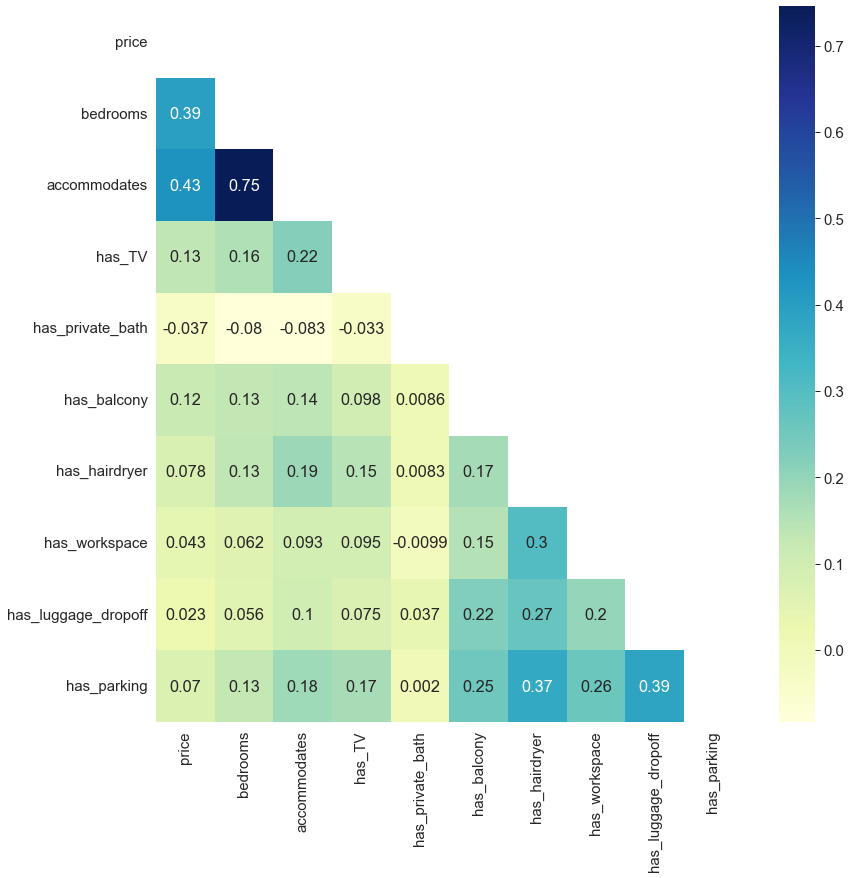

In [633]:
brooklynMatrix = brooklyn_amenities.corr()
mask = np.triu(np.ones_like(brooklyn_amenities.corr(), dtype=np.bool))
sns.heatmap(brooklynMatrix, annot=True, cmap='YlGnBu', mask=mask)
plt.show()

In [634]:
queens_amenities = queens_area[['price','bedrooms','accommodates','has_TV','has_private_bath','has_balcony','has_hairdryer','has_workspace','has_luggage_dropoff','has_parking']]
queens_amenities['price'] = queens_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
queens_amenities


/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/1010508692.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  queens_amenities['price'] = queens_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/1010508692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens_amenities['price'] = queens_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)


,price,bedrooms,accommodates,has_TV,has_private_bath,has_balcony,has_hairdryer,has_workspace,has_luggage_dropoff,has_parking
23,145.0,1.0,4,0,1,1,1,1,1,1
25,75.0,1.0,3,1,1,0,0,0,0,1
86,78.0,1.0,1,0,0,0,1,1,0,1
100,395.0,5.0,16,1,0,0,1,0,0,1
109,65.0,1.0,2,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
38238,40.0,1.0,1,0,1,0,0,0,0,0
38246,47.0,1.0,1,0,0,0,0,0,1,1
38247,70.0,1.0,1,1,0,0,1,1,0,1
38249,81.0,1.0,3,1,0,0,1,1,0,0


/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/1839828807.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(queens_amenities.corr(), dtype=np.bool))


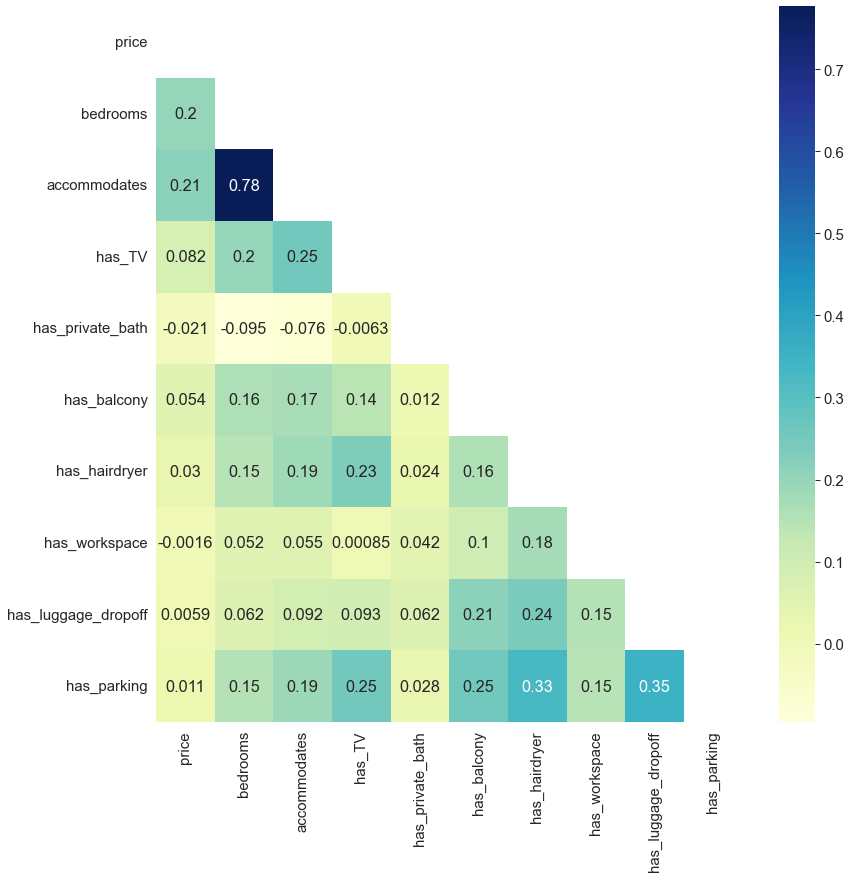

In [635]:
queensMatrix = queens_amenities.corr()
mask = np.triu(np.ones_like(queens_amenities.corr(), dtype=np.bool))
sns.heatmap(queensMatrix, annot=True, cmap='YlGnBu', mask=mask)
plt.show()